In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
import pandas as pd
from scipy.integrate import odeint, RK45, solve_ivp, quad

# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombres: Miguel Jaramillo Valencia y Gabriel Rodríguez Suárez
*Métodos computacionales 2024-II*

---

# **1**
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

In [40]:
def Euler(funcion, t0, N0, h, t_end):
    '''Función que calcula solución de la EDO para tiempo de decaimiento radiactivo:

    Entradas:
    - funcion: Función a evaluar.
    - t0, N0: Condiciones iniciales de la EDO (PVI).
    - h: Paso.
    - t_end: Parámetro de cuminación de la variable independiente.

    Salida:
    - t: Array de tiempo.
    - n: Array de resultados N.
    '''
    #Cálculo del número de pasos:
    n = int((t_end - t0)/h)
    # Arrays con las soluciones:
    t = np.zeros(n+1)
    N = np.zeros(n+1)
    #Condiciones iniciales:
    t[0] = t0
    N[0] = N0

    for i in range(n):
        t[i+1] = t[i] + h
        N[i+1] = N[i] + funcion(N[i])*h # Aquí la función depende sólo del parámetro N.
    return t, N

In [41]:
def func_N(n):
    t_med = 15
    l = np.log(2)/t_med
    return -l*n

In [42]:
N0 = 1000
h = 0.01
t0 = 0
tf = 100
t_media = 15

In [43]:
t, N = Euler(func_N, t0, N0, h, tf)

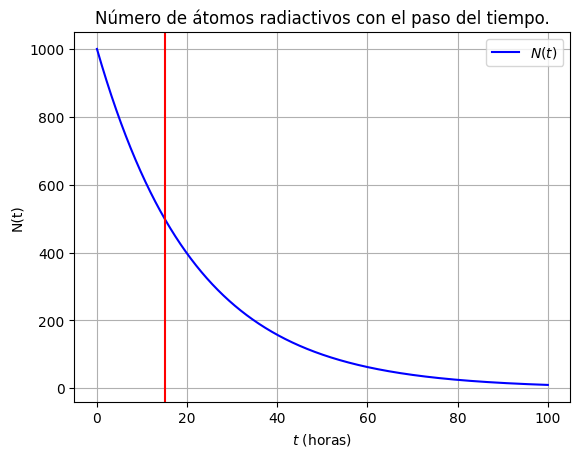

In [44]:
plt.plot(t, N, 'b-', label=r'$N(t)$')
plt.title('Número de átomos radiactivos con el paso del tiempo.')
plt.legend()
plt.grid()
plt.xlabel(r'$t$ (horas)')
plt.ylabel(r'N(t)')
plt.axvline(t_media, color='r')
plt.show()

# **2**
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es

$$\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t} $$

Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


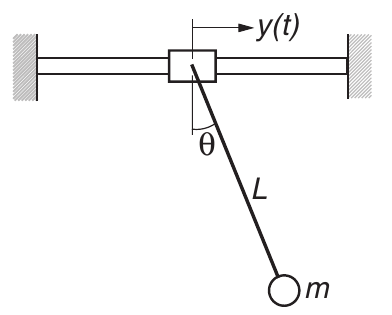

In [45]:
#Parámetros del código:
g, L , Y, w = 9.8, 1.0, 0.25, 2.5

t_span = np.array([0, 10])
t_ = np.linspace(t_span[0], t_span[1], 200)

#Conidciones iniciales:
THETA = np.array([0, 0.1])

In [46]:
def pendulo_corredizo(t, angulo):
      dtheta_dt = np.zeros_like(angulo)
      dtheta_dt[0] = angulo[1]
      dtheta_dt[1] = -(g/L)*np.sin(angulo[0]) + ((w**2)/L)*np.cos(angulo[0]) + Y*np.sin(w*t)
      return dtheta_dt

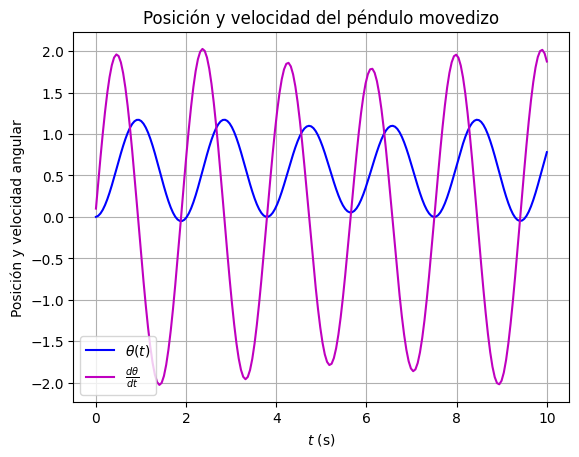

In [47]:
sol_pendulo_ivp = solve_ivp(pendulo_corredizo, t_span, THETA, method='RK45', t_eval=t_)

t = sol_pendulo_ivp.t
theta = sol_pendulo_ivp.y[0]
angular_speed = sol_pendulo_ivp.y[1]

plt.plot(t, theta, 'b-', label=r'$\theta(t)$')
plt.plot(t, angular_speed, 'm-', label=r'$\frac{d\theta}{dt}$')
plt.title('Posición y velocidad del péndulo movedizo')
plt.legend()
plt.xlabel(r'$t$ (s)')
plt.ylabel('Posición y velocidad angular')
plt.grid()
plt.show()

# **3**
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

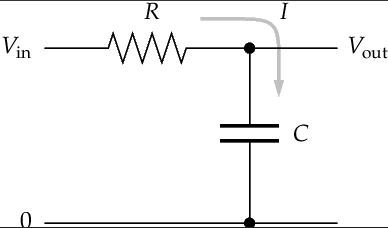


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


## Parámetros:

In [56]:
t0 = 0
h = 0.1 
N = 50 # Número de pasos.
tf = N*h + t0
t = np.linspace(t0, 10, 100)
RC = np.array([0.01, 0.1, 1])
V_out0 = 0


#def V_in(t):
    #t_floor =  np.floor(2*t)
    #V = np.zeros_like(t, dtype=float)
    #for i in range(len(t_floor)):
        #if i % 2 == 0:
            #V[i] = 1.0
        #else:
           #V[i] = -1.0
    #return V

#Ahora sólo entregando el valor de t:

def V_in(tiempo):
    piso = np.floor(2*tiempo)
    #Vin = np.zeros(200)
    if piso % 2 == 0:
        return 1.0
    else:
        return -1.0


## Solución por odeint:

In [57]:
def dVout_dt(Vout, t):
    return (V_in(t) - Vout)/0.1

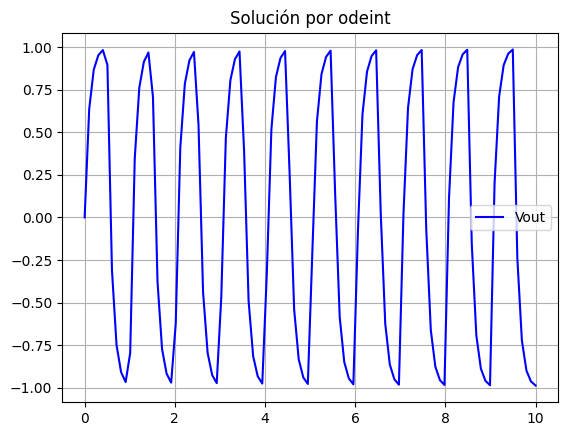

In [58]:
Vout_odeint = odeint(dVout_dt, V_out0, t)

#for i,k in enumerate(RC):
    #Vout_odeint = odeint(dVout_dt, V_out0, t, args=(k,))
    #soluciones[i] = Vout_odeint
#print(soluciones)

#Vout_odeint

plt.plot(t, Vout_odeint, 'b-', label='Vout')
plt.title('Solución por odeint')
plt.legend()
plt.grid()
plt.show()

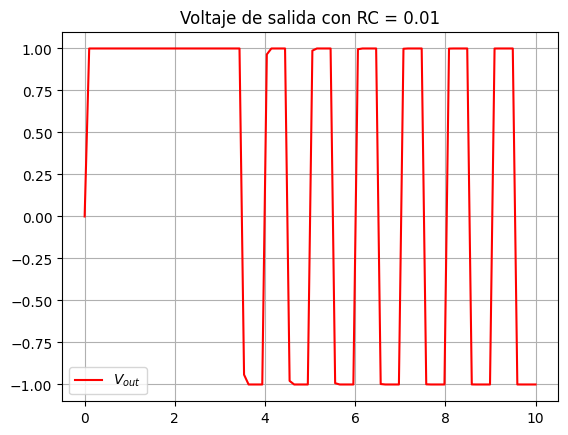

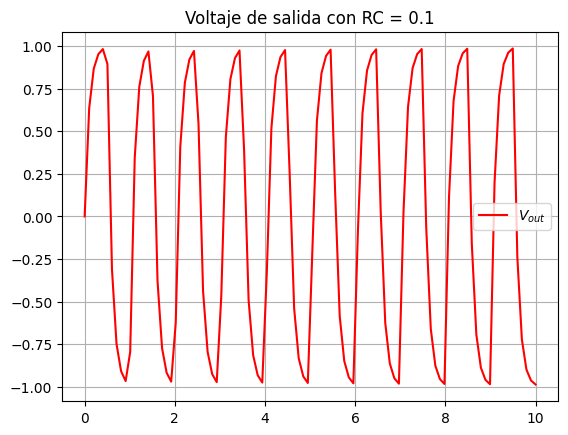

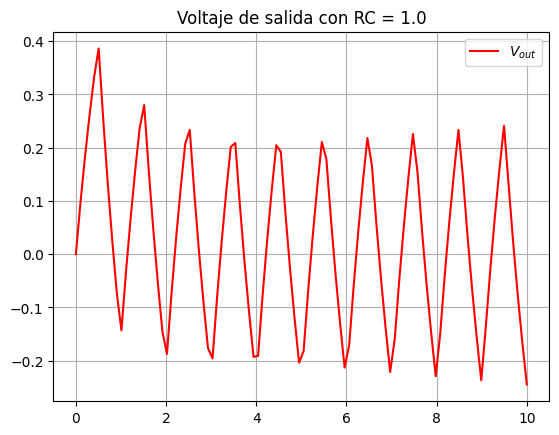

In [59]:
def dVout_dt(Vout, t, RC):
    return (V_in(t) - Vout)/RC

for i in RC:
    Vout_odeint = odeint(dVout_dt, V_out0, t, args=(i,))

    plt.plot(t, Vout_odeint, 'r-', label=r'$V_{out}$')
    plt.title(f'Voltaje de salida con RC = {i}')
    plt.legend()
    plt.grid()
    plt.show()

## Solución por solve_ivp:

In [60]:
def dVout_dt2(t, Vout):
    return (V_in(t) - Vout)/0.1

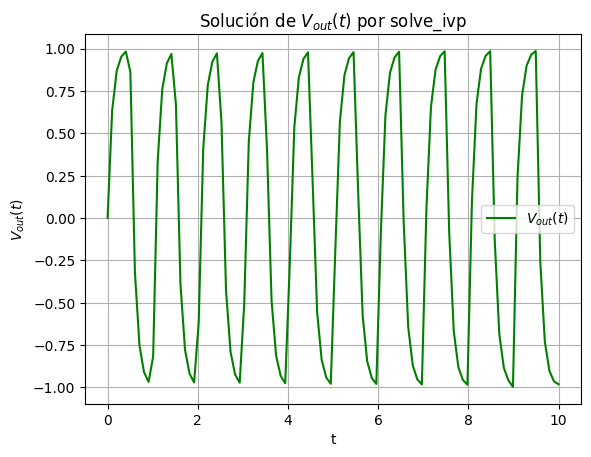

In [61]:
sol_ipv = solve_ivp(dVout_dt2, t_span=(t0, 10), y0=np.array([V_out0]), method='RK45', t_eval=t)

t_ivp = sol_ipv.t
y_ivp = sol_ipv.y[0]

plt.plot(t_ivp, y_ivp, 'g-', label=r'$V_{out}(t)$')
plt.title(r'Solución de $V_{out}(t)$ por solve_ivp')
plt.legend()
plt.ylabel(r'$V_{out}(t)$')
plt.xlabel('t')
plt.grid()
plt.show()

In [62]:
def dVout_dt(t, Vout, RC):
    return (V_in(t) - Vout)/RC

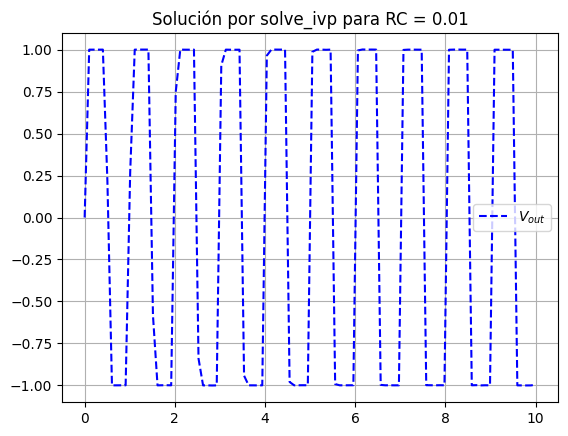

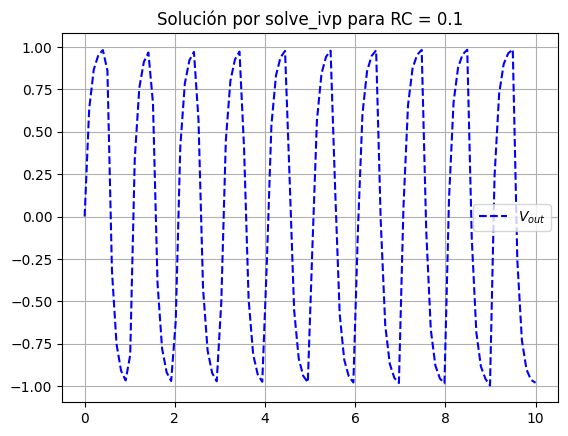

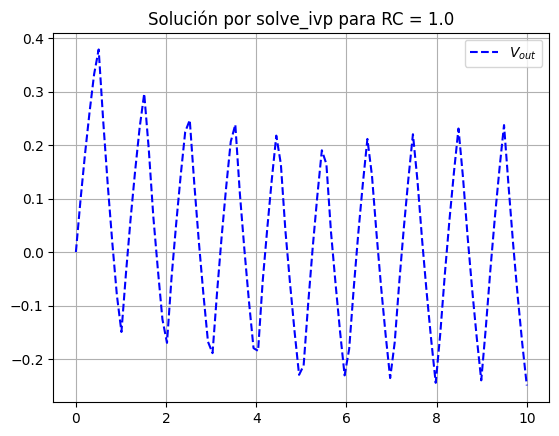

In [63]:
RC = np.array([0.01, 0.1, 1.0])
for i in RC:
    solve_ivp_mult = solve_ivp(dVout_dt, t_span=(0, 10), y0=[V_out0], args=(i,), t_eval=t)
    plt.plot(solve_ivp_mult.t, solve_ivp_mult.y[0], 'b--', label=r'$V_{out}$')
    plt.title(f'Solución por solve_ivp para RC = {i}')
    plt.legend()
    plt.grid()
    plt.show()

# **4**


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

## Para $u_{0} = 1$:

In [64]:
U0 = np.array([1, 0])
#h = 0.0001
g = 9.8
l = 1.0
t_span =np.array([0, 5])
t_ = np.linspace(0, 5, 100)
U0 = np.array([1, 0])

In [65]:
def d2u_dt(t, U):
    du2_dt = np.zeros_like(U)
    du2_dt[0] = U[1]
    du2_dt[1] = -(g/l)*np.sin(U[0])
    return du2_dt

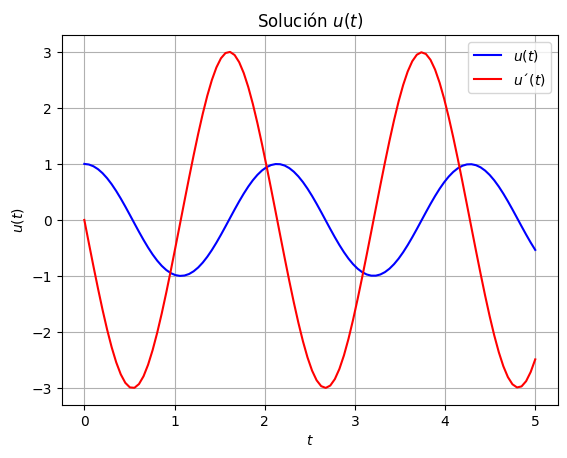

In [66]:
sol_1 = solve_ivp(d2u_dt, t_span, U0, method='RK45', t_eval=t_)

t_sol1= sol_1.t
u_sol1 = sol_1.y[0]
uprime_sol = sol_1.y[1]

plt.plot(t_sol1, u_sol1, 'b-', label=r'$u(t)$')
plt.plot(t_sol1, uprime_sol, 'r-', label=r'$u´(t)$')
plt.title(r'Solución $u(t)$')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$u(t)$')
plt.grid()
plt.show()

## Para $u_{0} = \pi/2$:

In [67]:
U0 = np.array([1, 0])
#h = 0.0001
g = 9.8
l = 1.0
t_span =np.array([0, 5])
t_ = np.linspace(0, 5, 100)
U0 = np.array([np.pi/2, 0])

def d2u_dt(t, U):
    du2_dt = np.zeros_like(U)
    du2_dt[0] = U[1]
    du2_dt[1] = -(g/l)*np.sin(U[0])
    return du2_dt

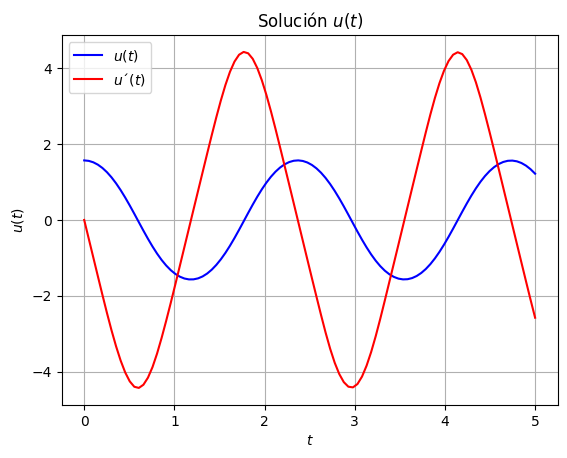

In [68]:
sol_2 = solve_ivp(d2u_dt, t_span, U0, method='RK45', t_eval=t_)

t_sol2= sol_2.t
u_sol2 = sol_2.y[0]
uprime_sol2 = sol_2.y[1]

plt.plot(t_sol2, u_sol2, 'b-', label=r'$u(t)$')
plt.plot(t_sol2, uprime_sol2, 'r-', label=r'$u´(t)$')
plt.title(r'Solución $u(t)$')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$u(t)$')
plt.grid()
plt.show()

## Resolviendo la integral:

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

In [69]:
#U0 = np.arange(-np.pi, np.pi+0.1, 0.1)
U0 = np.linspace(-np.pi, np.pi, 100)
alpha = np.sin(U0/2)**2

In [70]:
def K1(alpha):
    k_prima1 = lambda z: 1/np.sqrt((1-z**2)*(1-alpha*z**2))
    K1 = quad(k_prima1, 0, 1- 1e-6)[0]
    return K1

integral_K = np.zeros_like(alpha)
for i, j in enumerate(alpha):
    integral_K[i] = K1(j)

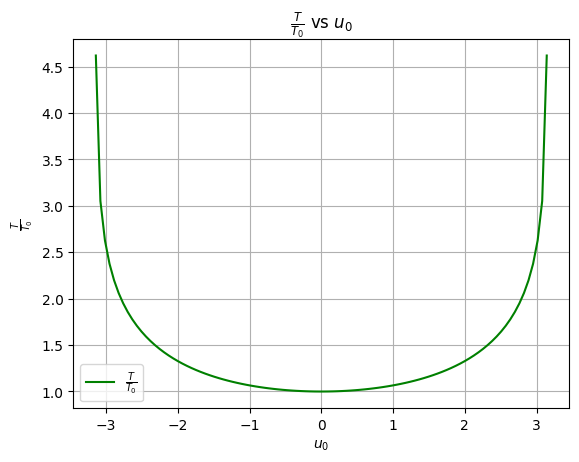

In [71]:
T_T0 = (2/np.pi)*integral_K

plt.plot(U0, T_T0, 'g-', label=r'$\frac{T}{T_{0}}$')
plt.title(r'$\frac{T}{T_{0}}$ vs $u_{0}$')
plt.legend()
plt.xlabel(r'$u_{0}$')
plt.ylabel(r'$\frac{T}{T_{0}}$')
plt.grid()
plt.show()

# **5**

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$
\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},

$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v

$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x

$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},

$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


## Para $ F = 0$ y $\gamma = [0, 0.05, 0.3]$:

In [119]:
w0 = 1
F = 0
k, m = 1, 1
t0, T, = 0, 10
t_span = np.array([t0, 50])
t = np.arange(t0, 50, 0.1)

#Condiciones iniciales:
X0 = np.array([0,1])

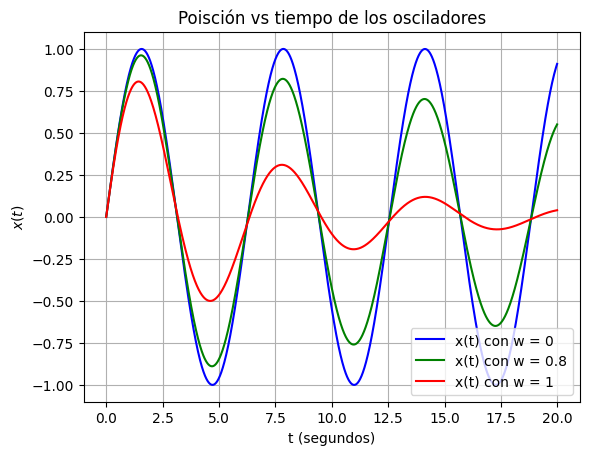

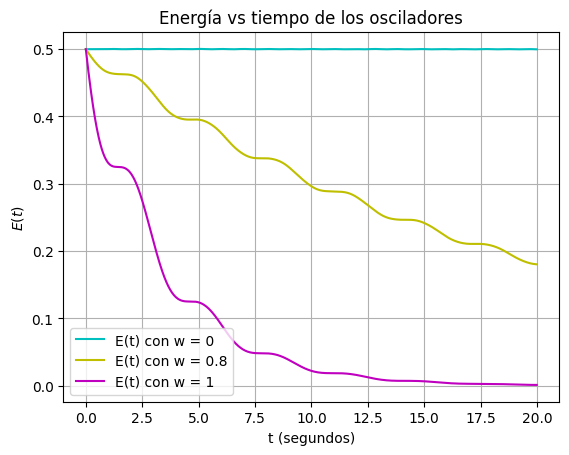

In [120]:
def dv_dt(t, X0, g_):
    dv = np.zeros_like(X0)
    dv[0] = X0[1]  
    dv[1] = -g_*X0[1] - (w0**2)*X0[0]
    return dv

def energia(x, v):
    return (1/2)*m*v**2 + (1/2)*k*x**2

gamma_values = np.array([0, 0.05, 0.3])  # Example gamma values

x = []
t = []
v = []

for i in gamma_values:
    sol_0 = solve_ivp(dv_dt, t_span, y0=X0, method='RK45', args=(i,), t_eval=t_)
    t.append(sol_0.t)
    x.append(sol_0.y[0])
    v.append(sol_0.y[1])

plt.plot(t[0], x[0], 'b',label='x(t) con w = 0')
plt.plot(t[1], x[1], 'g',label='x(t) con w = 0.8')
plt.plot(t[2], x[2], 'r',label='x(t) con w = 1')
plt.title('Poisción vs tiempo de los osciladores')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$x(t)$')
plt.grid()
plt.show()

plt.plot(t[0], energia(x[0],v[0]), 'c',label=f'E(t) con w = 0')
plt.plot(t[1], energia(x[1],v[1]), 'y',label=f'E(t) con w = 0.8')
plt.plot(t[2], energia(x[2],v[2]), 'm',label=f'E(t) con w = 1')
plt.title('Energía vs tiempo de los osciladores')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$E(t)$')
plt.grid()
plt.show()

## Para $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$:

In [121]:
gamma = 0
F0 = 1
w0 = 1
m = 1
T = 10
w = np.array([0*w0,0.8*w0,w0])
t_span = np.array([0,50])
t_ = np.arange(0, 50, 0.1)
X0 = np.array([0,1])
k = 1

In [122]:
def dv_dt0(t, X0, w_angular):
    x0, v0 = X0
    return np.array([v0 ,(F0/m)*np.cos(w_angular*t)*np.exp((-t**2)/T**2) -gamma*v0 - (w0**2)*x0])

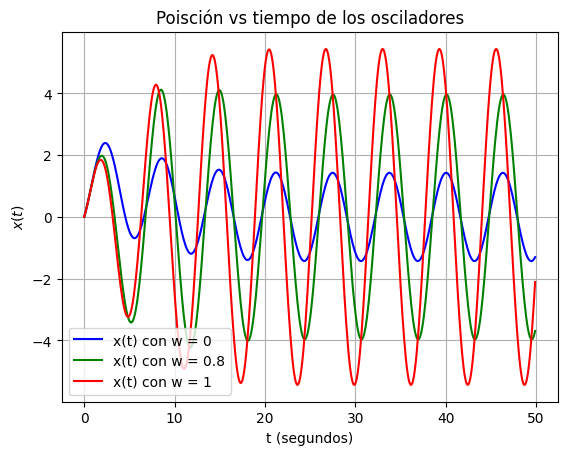

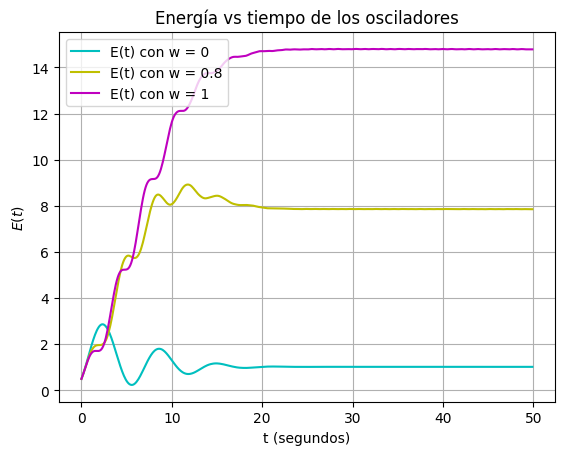

In [123]:
def energia(x, v):
        return (1/2)*m*v**2 + (1/2)*k*x**2

x = []
v = []
t = []
for i in w:
    sol = solve_ivp(dv_dt0, t_span, X0, method='RK45', args=(i,), t_eval=t_)
    t.append(sol.t)
    x.append(sol.y[0])
    v.append(sol.y[1])


plt.plot(t[0], x[0], 'b',label='x(t) con w = 0')
plt.plot(t[1], x[1], 'g',label='x(t) con w = 0.8')
plt.plot(t[2], x[2], 'r',label='x(t) con w = 1')
plt.title('Poisción vs tiempo de los osciladores')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$x(t)$')
plt.grid()
plt.show()

plt.plot(t[0], energia(x[0],v[0]), 'c',label=f'E(t) con w = 0')
plt.plot(t[1], energia(x[1],v[1]), 'y',label=f'E(t) con w = 0.8')
plt.plot(t[2], energia(x[2],v[2]), 'm',label=f'E(t) con w = 1')
plt.title('Energía vs tiempo de los osciladores')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$E(t)$')
plt.grid()
plt.show()

# **6**

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.



## a) Por método de Euler:

In [86]:
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01

t_span = np.array([0, 50])
t_ = np.linspace(0, 50, 100)

In [87]:
def Euler_poblacional(t0, x0, y0, h, tf):
    
    n_steps = int((tf-t0)/h)

    t = np.zeros(n_steps+1)
    x = np.zeros(n_steps+1)
    y = np.zeros(n_steps+1)

    t[0] = t0
    x[0] = x0
    y[0] = y0

    for i in range(n_steps):
        t[i+1] = t[i] + h
        x[i+1] = x[i] + h*(alpha*x[i] - beta*x[i]*y[i])
        y[i+1] = y[i] + h*(-gamma*y[i] + delta*x[i]*y[i])

    return t, x, y

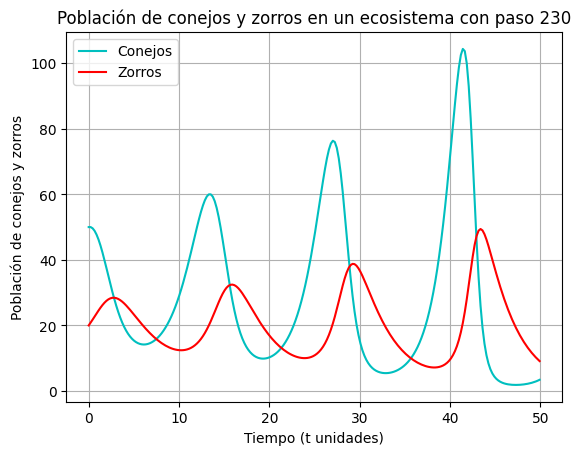

In [88]:
x0 , y0 = 50, 20
h = 0.218
tiempo, conejos, zorros = Euler_poblacional(t_span[0], x0, y0, h, t_span[1])

plt.plot(tiempo, conejos, 'c-', label='Conejos')
plt.plot(tiempo, zorros, 'r-', label='Zorros')
plt.title(f'Población de conejos y zorros en un ecosistema con paso {len(tiempo)}')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

## b) Por método de Runge-Kutta 2 y 4:

In [89]:
def sistema_poblacional(t, P):
    d_dt = np.zeros(2)
    d_dt[0] = alpha*P[0] - beta*P[0]*P[1]
    d_dt[1] = -gamma*P[1] + delta*P[0]*P[1]
    return d_dt

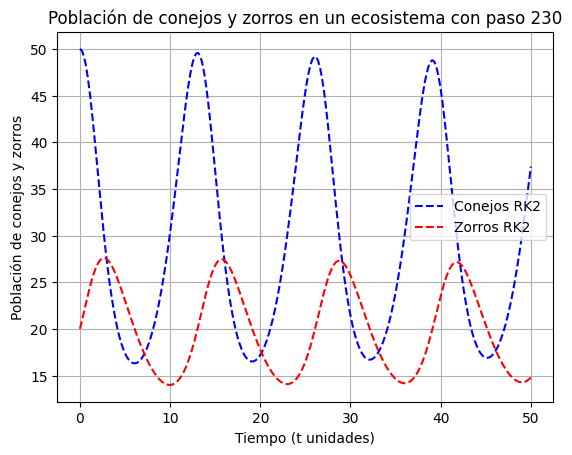

In [90]:
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01
P = np.array([50, 20])

t_span = np.array([0, 50])
t_ = np.linspace(0, 50, 230)

sol_poblacion = solve_ivp(sistema_poblacional, t_span, P, method='RK23', t_eval=t_)

tiempo_rk2 = sol_poblacion.t
conejos_rk2 = sol_poblacion.y[0]
zorros_rk2 = sol_poblacion.y[1]

plt.plot(tiempo_rk2, conejos_rk2, 'b--', label='Conejos RK2')
plt.plot(tiempo_rk2, zorros_rk2, 'r--', label='Zorros RK2')
plt.title(f'Población de conejos y zorros en un ecosistema con paso {len(tiempo_rk2)}')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

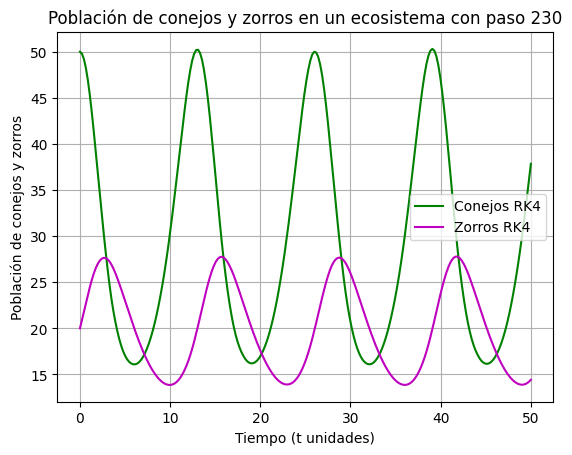

In [91]:
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01
P = np.array([50, 20])

t_span = np.array([0, 50])
t_ = np.linspace(0, 50, 230)

sol_poblacion = solve_ivp(sistema_poblacional, t_span, P, method='RK45', t_eval=t_)

tiempo_rk4 = sol_poblacion.t
conejos_rk4 = sol_poblacion.y[0]
zorros_rk4 = sol_poblacion.y[1]

plt.plot(tiempo_rk4, conejos_rk4, 'g-', label='Conejos RK4')
plt.plot(tiempo_rk4, zorros_rk4, 'm-', label='Zorros RK4')
plt.title(f'Población de conejos y zorros en un ecosistema con paso {len(tiempo_rk4)}')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

## c) Comparación de los métodos:

### Comparaciones y diagramas de fases:

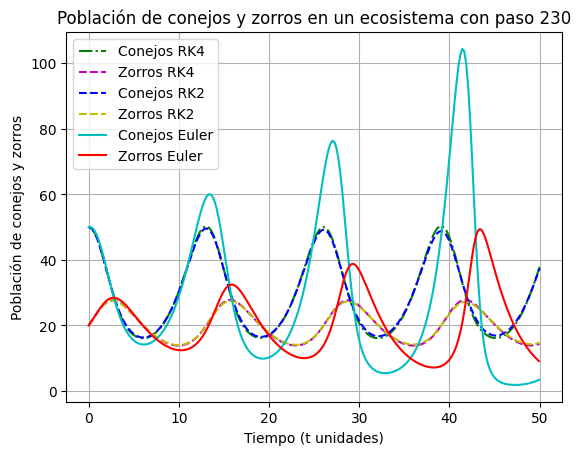

In [92]:
plt.plot(tiempo_rk4, conejos_rk4, 'g-.', label='Conejos RK4')
plt.plot(tiempo_rk4, zorros_rk4, 'm--', label='Zorros RK4')
plt.plot(tiempo_rk2, conejos_rk2, 'b--', label='Conejos RK2')
plt.plot(tiempo_rk2, zorros_rk2, 'y--', label='Zorros RK2')
plt.plot(tiempo, conejos, 'c-', label='Conejos Euler')
plt.plot(tiempo, zorros, 'r-', label='Zorros Euler')
plt.title(f'Población de conejos y zorros en un ecosistema con paso {len(tiempo_rk4)}')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

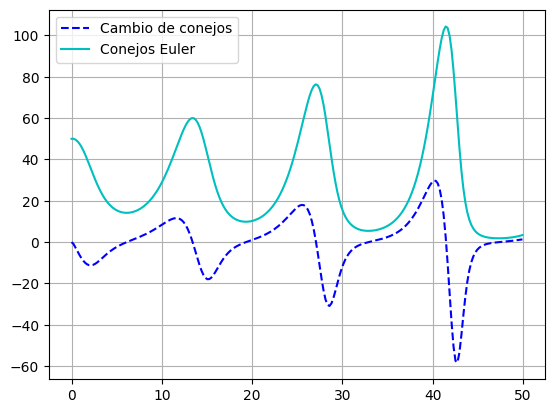

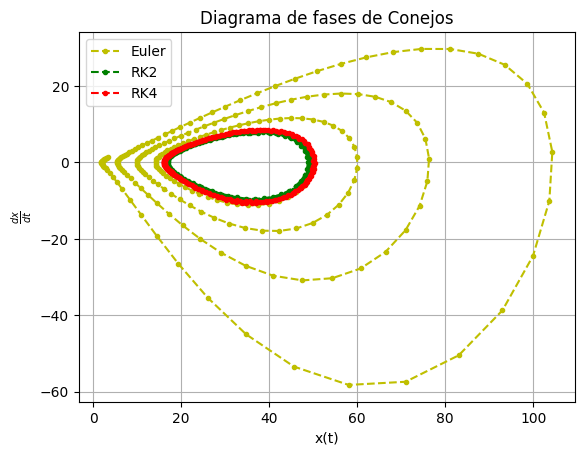

In [93]:
x_prima_euler = np.gradient(conejos, tiempo)
x_prima_rk2 = np.gradient(conejos_rk2, tiempo_rk2)
x_prima_rk4 = np.gradient(conejos_rk4, tiempo_rk4)

plt.plot(tiempo, x_prima_euler, 'b--', label='Cambio de conejos')
plt.plot(tiempo, conejos, 'c-', label='Conejos Euler')
plt.legend()
plt.grid()
plt.show()

plt.plot(conejos, x_prima_euler, 'y--.', label='Euler')
plt.plot(conejos_rk2, x_prima_rk2, 'g--.', label='RK2')
plt.plot(conejos_rk4, x_prima_rk4, 'r--.', label='RK4')
plt.title('Diagrama de fases de Conejos')
plt.legend()
plt.grid()
plt.xlabel('x(t)')
plt.ylabel(r'$\frac{dx}{dt}$')
plt.show()

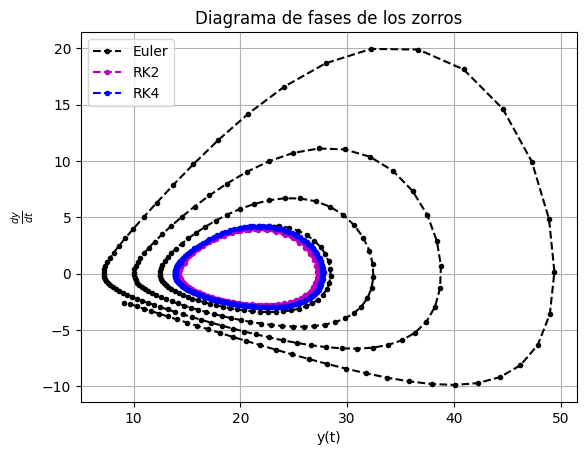

In [94]:
y_prima_euler = np.gradient(zorros, tiempo)
y_prima_rk2 = np.gradient(zorros_rk2, tiempo_rk2)
y_prima_rk4 = np.gradient(zorros_rk4, tiempo_rk4)

plt.plot(zorros, y_prima_euler, 'k--.', label='Euler')
plt.plot(zorros_rk2, y_prima_rk2, 'm--.', label='RK2')
plt.plot(zorros_rk4, y_prima_rk4, 'b--.', label='RK4')
plt.title('Diagrama de fases de los zorros')
plt.legend()
plt.xlabel('y(t)')
plt.ylabel(r'$\frac{dy}{dt}$')
plt.grid()
plt.show()

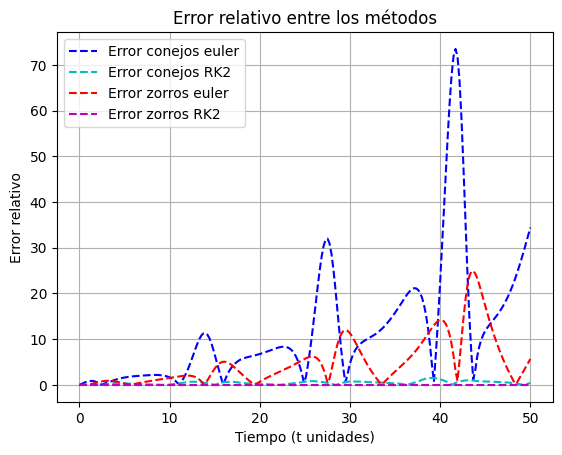

In [95]:
referencia_c, referencia_z = conejos_rk4, zorros_rk2

c1, z1 = np.abs(conejos - referencia_c), np.abs(referencia_z - zorros)
c2, z2 = np.abs(referencia_c - conejos_rk2), np.abs(referencia_z - zorros_rk2)

plt.plot(tiempo_rk4, c1, 'b--', label='Error conejos euler')
plt.plot(tiempo_rk4, c2, 'c--', label='Error conejos RK2')
plt.plot(tiempo_rk4, z1, 'r--', label='Error zorros euler')
plt.plot(tiempo_rk4, z2, 'm--', label='Error zorros RK2')
plt.title('Error relativo entre los métodos')
plt.legend()
plt.grid()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Error relativo')
plt.show()

### Cálculo del error relativo:

In [96]:
error_rk2 = np.linalg.norm(conejos_rk4 - conejos_rk2)/np.linalg.norm(conejos_rk4)
error_euler =np.linalg.norm(conejos_rk4 - conejos)/np.linalg.norm(conejos_rk4)

print(f'Error por Euler: {error_euler}')
print(f'Error por Runge-Kutta 2: {error_rk2}')

Error por Euler: 0.5784500752957455
Error por Runge-Kutta 2: 0.017853053988938956


## d) Cambiando h entre 0.5 y 0.05:

### Euler:

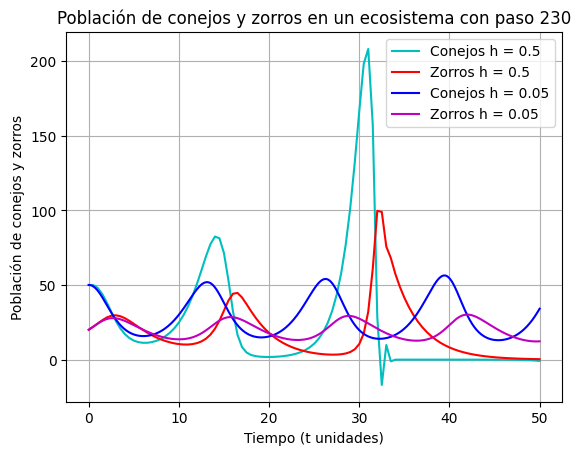

In [97]:
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01

t_span = np.array([0, 50])
t_ = np.linspace(0, 50, 100)

x0 , y0 = 50, 20
h = 0.5
tiempo05, conejos05, zorros05 = Euler_poblacional(t_span[0], x0, y0, h, t_span[1])
h = 0.05
tiempo005, conejos005, zorros005 = Euler_poblacional(t_span[0], x0, y0, h, t_span[1])

plt.plot(tiempo05, conejos05, 'c-', label='Conejos h = 0.5')
plt.plot(tiempo05, zorros05, 'r-', label='Zorros h = 0.5')
plt.plot(tiempo005, conejos005, 'b-', label='Conejos h = 0.05')
plt.plot(tiempo005, zorros005, 'm-', label='Zorros h = 0.05')
plt.title(f'Población de conejos y zorros en un ecosistema con paso {len(tiempo)}')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

### Runge-Kutta 2:

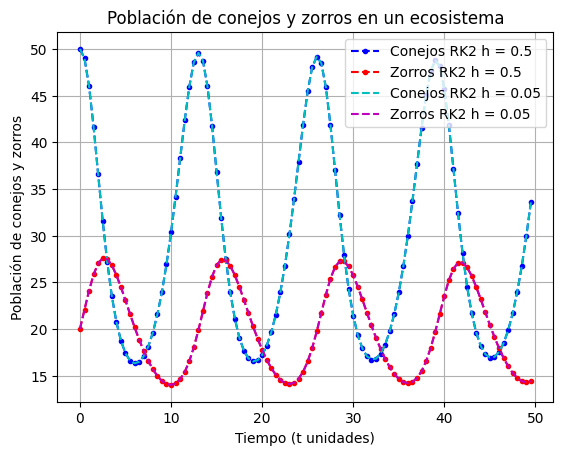

In [98]:
def sistema_poblacional(t, P):
    d_dt = np.zeros(2)
    d_dt[0] = alpha*P[0] - beta*P[0]*P[1]
    d_dt[1] = -gamma*P[1] + delta*P[0]*P[1]
    return d_dt

alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01
P = np.array([50, 20])

t_span = np.array([0, 50])
t_ = np.arange(0, 50, 0.5)

sol_poblacion = solve_ivp(sistema_poblacional, t_span, P, method='RK23', t_eval=t_)

tiempo_rk2 = sol_poblacion.t
conejos_rk2 = sol_poblacion.y[0]
zorros_rk2 = sol_poblacion.y[1]

t_005 = np.arange(0, 50, 0.05)
sol_poblacion005 = solve_ivp(sistema_poblacional, t_span, P, method='RK23', t_eval=t_005)

tiempo_rk2_005 = sol_poblacion.t
conejos_rk2_005 = sol_poblacion.y[0]
zorros_rk2_005 = sol_poblacion.y[1]


plt.plot(tiempo_rk2, conejos_rk2, 'b--.', label='Conejos RK2 h = 0.5')
plt.plot(tiempo_rk2, zorros_rk2, 'r--.', label='Zorros RK2 h = 0.5')
plt.plot(tiempo_rk2_005, conejos_rk2_005, 'c--', label='Conejos RK2 h = 0.05')
plt.plot(tiempo_rk2_005, zorros_rk2_005, 'm--', label='Zorros RK2 h = 0.05')
plt.title(f'Población de conejos y zorros en un ecosistema')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

### Runge-Kutta 4:

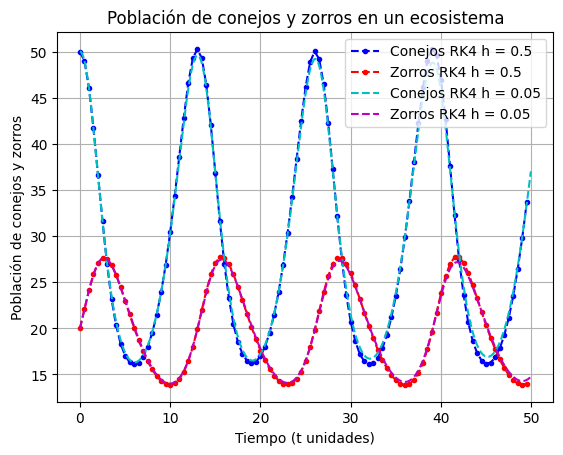

In [99]:
def sistema_poblacional(t, P):
    d_dt = np.zeros(2)
    d_dt[0] = alpha*P[0] - beta*P[0]*P[1]
    d_dt[1] = -gamma*P[1] + delta*P[0]*P[1]
    return d_dt

alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01
P = np.array([50, 20])

t_span = np.array([0, 50])
t_ = np.arange(0, 50, 0.5)

sol_rk4 = solve_ivp(sistema_poblacional, t_span, P, method='RK45', t_eval=t_)

tiempo_rk4 = sol_rk4.t
conejos_rk4 = sol_rk4.y[0]
zorros_rk4 = sol_rk4.y[1]

t_005 = np.arange(0, 50, 0.05)
sol_poblacion005 = solve_ivp(sistema_poblacional, t_span, P, method='RK23', t_eval=t_005)

tiempo_rk4_005 = sol_poblacion005.t
conejos_rk4_005 = sol_poblacion005.y[0]
zorros_rk4_005 = sol_poblacion005.y[1]


plt.plot(tiempo_rk4, conejos_rk4, 'b--.', label='Conejos RK4 h = 0.5')
plt.plot(tiempo_rk4, zorros_rk4, 'r--.', label='Zorros RK4 h = 0.5')
plt.plot(tiempo_rk4_005, conejos_rk4_005, 'c--', label='Conejos RK4 h = 0.05')
plt.plot(tiempo_rk4_005, zorros_rk4_005, 'm--', label='Zorros RK4 h = 0.05')
plt.title(f'Población de conejos y zorros en un ecosistema')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

## e) Investigndo el parámetro $\gamma$:

Para este caso se eligió el parámetro $\gamma$, el cual representa la tasa de mortalidad natural de los zorros. Hablando en términos de biología, si este aumenta, indica que la población de zorros tiene un mayor índice de individuos muertos en un tiempo $t$.

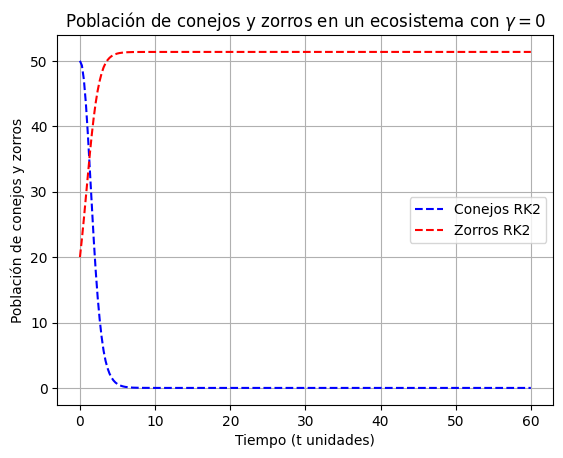

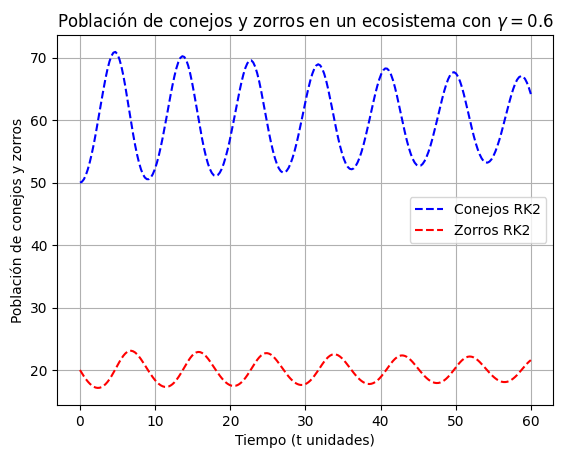

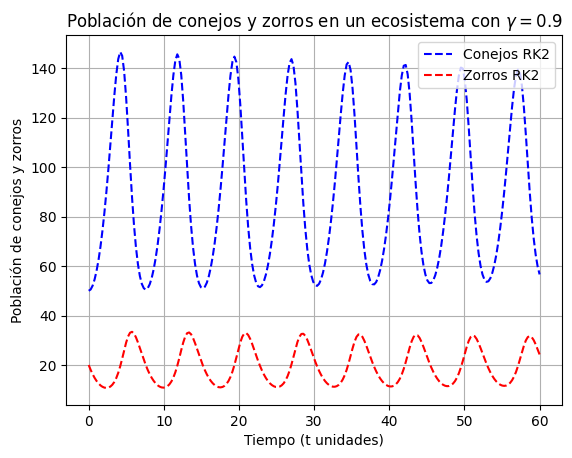

In [100]:
alpha = 0.8
beta = 0.04
gamma = np.array([0, 0.6, 0.9])
delta = 0.01
P = np.array([50, 20])

def sistema_poblacional2(t, P, gamma):
    d_dt = np.zeros(2)
    d_dt[0] = alpha*P[0] - beta*P[0]*P[1]
    d_dt[1] = -gamma*P[1] + delta*P[0]*P[1]
    return d_dt

t_span = np.array([0, 60])
t_ = np.linspace(0, 60, 230)

t_rk2 = []
rabbits_rk2 = []
foxes_rk2 = []

for i in gamma:
    sol_poblacion = solve_ivp(sistema_poblacional2, t_span, P, method='RK23', args=(i,), t_eval=t_)
    t_rk2.append(sol_poblacion.t)
    rabbits_rk2.append(sol_poblacion.y[0])
    foxes_rk2.append(sol_poblacion.y[1])

plt.plot(t_rk2[0], rabbits_rk2[0], 'b--', label='Conejos RK2')
plt.plot(t_rk2[0], foxes_rk2[0], 'r--', label='Zorros RK2')
plt.title(r'Población de conejos y zorros en un ecosistema con $\gamma = 0$')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

plt.plot(t_rk2[1], rabbits_rk2[1], 'b--', label='Conejos RK2')
plt.plot(t_rk2[1], foxes_rk2[1], 'r--', label='Zorros RK2')
plt.title(r'Población de conejos y zorros en un ecosistema con $\gamma = 0.6$')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

plt.plot(t_rk2[2], rabbits_rk2[2], 'b--', label='Conejos RK2')
plt.plot(t_rk2[2], foxes_rk2[2], 'r--', label='Zorros RK2')
plt.title(r'Población de conejos y zorros en un ecosistema con $\gamma = 0.9$')
plt.legend()
plt.xlabel('Tiempo (t unidades)')
plt.ylabel('Población de conejos y zorros')
plt.grid()
plt.show()

## Parámetro $\beta$:

In [115]:
t_= np.linspace(0, 50, 100)

alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01

t0 = 0
x0 = 50
y0 = 20

P = np.array([50, 20])

beta_ = [0, 10, 50, 100, 1000]

def sistema(t, X, beta_):

  df_dt = np.zeros_like(X)

  df_dt[0] = (alpha * X[0] - beta_ * X[0] * X[1])
  df_dt[1] = (-gamma * X[1] + delta * X[0] * X[1])

  return df_dt

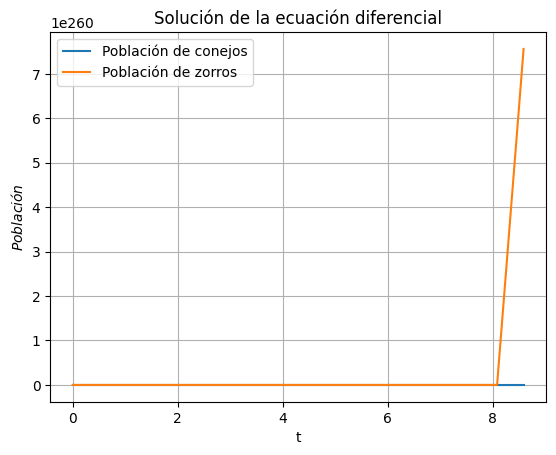

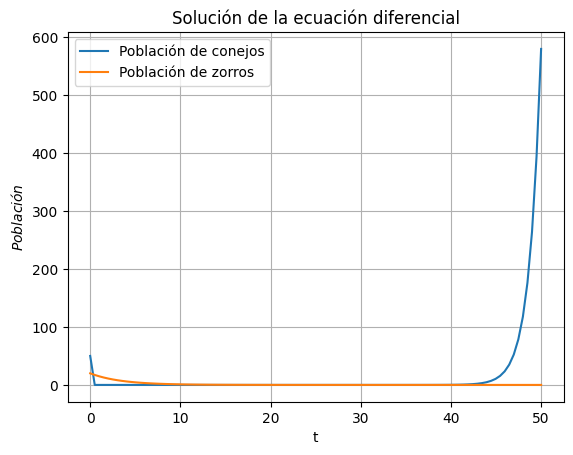

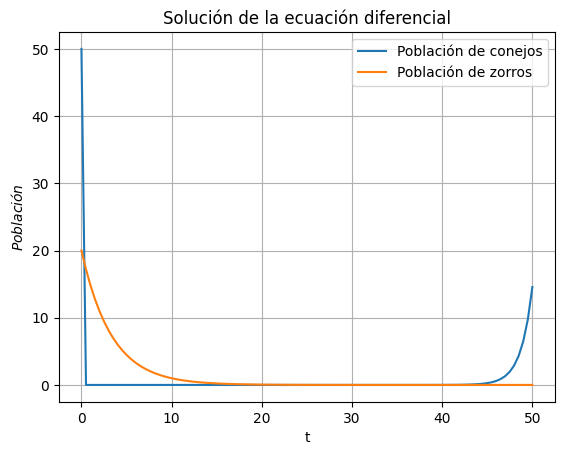

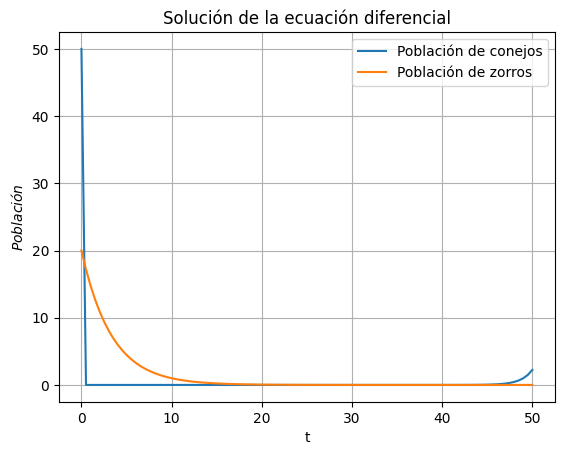

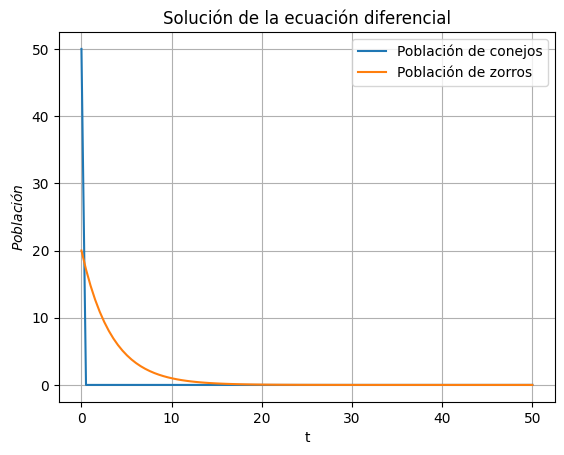

In [116]:
for i in beta_:

    sol = solve_ivp(sistema, [0, 50], P, t_eval = t_, args = (i,))

    t_sol = sol.t
    conejos = sol.y[0]
    zorros = sol.y[1]


    plt.plot(t_sol, conejos, label = 'Población de conejos')
    plt.plot(t_sol, zorros, label = 'Población de zorros')
    plt.xlabel('t')
    plt.legend()
    plt.ylabel(r'$Población$')
    plt.title('Solución de la ecuación diferencial')
    plt.grid()
    plt.show()

- La primera gráfica muestra la situación $\gamma = 0$, quiere decir que no muere ningún individuo, naturalmente (no de hambre), por lo que pasado cierto tiempo $t$, en este caso es un valor de $t > 10$, donde la población de conejos por todos los zorros presentes en el ecosistema, su número se reducirá a cero, pues tienen una gran cantidad de depredadores y como no mueren, naturalmente reitero, su tasa de reproducción $\alpha$ ya no es suficiente y su población desaparece del ecosistema. No obstante, la población de zorros se estabiliza en $y \approx 50$. Lo lógico sería que murieran de hambre, pues no hay nada por comer, en este ecosistema planteado. Sin embargo, tocaría modificar los demás parámetros para ver reflejado este cambio.

- La segunda gráfica muestra que la población de zorros es considerablemente mayor a la de conejos, teniendo valores máximos de hasta 70 individuos, mientras que los conejos si apenas tienen valores superiores a 20 individuos.

- La tercera ya el número de depredadores es aún mayor que el de presas, por lo que los zorros alcanzan hasta 140 individuos mientras que los conejos pasan de los 30 como máximo.

# **7**

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  


## Expresar en forma de ecuaciones diferenciales de primer orden:

\begin{equation}
    \dot{y_{1}} = y_{2}
\end{equation}

\begin{equation}
    \dot{y_{2}} = - y_{1}(\frac{g}{l} + \frac{k}{m}) + y_{3}\frac{k}{m}
\end{equation}

\begin{equation}
    \dot{y_{3}} = y_{4}
\end{equation}

\begin{equation}
    \dot{y_{4}} = - y_{3}(\frac{g}{l} + \frac{k}{m}) + y_{1}\frac{k}{m}
\end{equation}

Para convertirlo en un sistema de primer orden, utilizamos la definición:
$$
\begin{aligned}
y_1 &= \theta_1, \\
y_2 &= \dot{\theta}_1, \\
y_3 &= \theta_2, \\
y_4 &= \dot{\theta}_2.
\end{aligned}
$$

Entonces, el sistema de primer orden queda:

$$
\begin{aligned}
\dot{y}_1 &= y_2, \\
\dot{y}_2 &= -\frac{g}{L}y_1 - \frac{k}{m}(y_1 - y_3), \\
\dot{y}_3 &= y_4, \\
\dot{y}_4 &= -\frac{g}{L}y_3 - \frac{k}{m}(y_3 - y_1).
\end{aligned}
$$

El sistema de ecuaciones diferenciales de primer orden puede escribirse en forma matricial como:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{y} = [y_1, y_2, y_3, y_4]^T$ y la matriz $\mathbf{A}$ es:

$$
\mathbf{A} = \begin{bmatrix}
0 & 1 & 0 & 0 \\
-\left(\frac{g}{L} + \frac{k}{m}\right) & 0 & \frac{k}{m} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{m} & 0 & -\left(\frac{g}{L} + \frac{k}{m}\right) & 0
\end{bmatrix}.
$$


In [29]:
# Parámetros del sistema:
g, L, k, m = 9.8, 1, 0.5, 1

t0, tf = 0, 10
t_span = np.array([t0, tf])
t_ = np.arange(t0, tf, 0.01)

In [30]:
A = np.array([
    [0,1,0,0],
    [-(g/L + k/m), 0, k/m, 0],
    [0,0,0,1],
    [k/m, 0, -(g/L + k/m), 0]
    ])

b = np.zeros(np.shape(A)[0])

y0 = np.array([0.1, 0, 0, 0])

## Solución por Runge-Kutta 2 y 4:

In [31]:
def sistema_RK(t, y):
    return A @ y

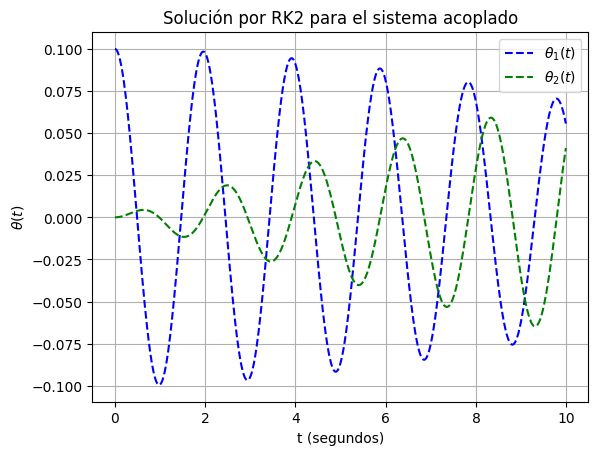

In [32]:
solucion23 = solve_ivp(sistema_RK, t_span, y0, method='RK23', t_eval=t_)

t23 = solucion23.t
theta1_23 = solucion23.y[0]
omega1_23 = solucion23.y[1]
theta2_23 = solucion23.y[2]
omega2_23 = solucion23.y[3]

plt.plot(t23, theta1_23, 'b--', label=r'$\theta_{1}(t)$')
plt.plot(t23, theta2_23, 'g--', label=r'$\theta_{2}(t)$')
plt.title('Solución por RK2 para el sistema acoplado')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$\theta(t)$')
plt.grid()
plt.show()

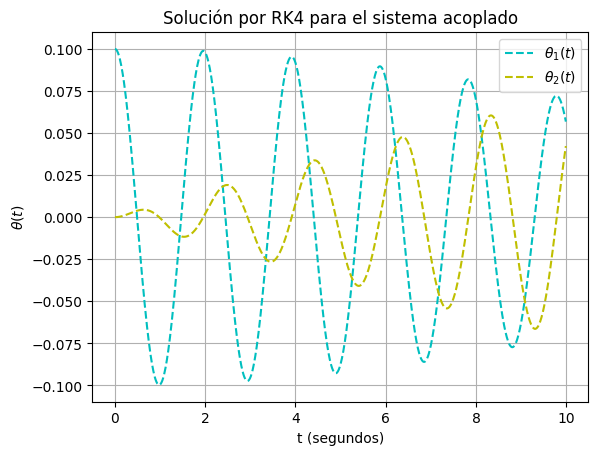

In [33]:
solucion45 = solve_ivp(sistema_RK, t_span, y0, method='RK45', t_eval=t_)

t45 = solucion45.t
theta1_45 = solucion45.y[0]
omega1_45 = solucion45.y[1]
theta2_45 = solucion45.y[2]
omega2_45 = solucion45.y[3]

plt.plot(t45, theta1_45, 'c--', label=r'$\theta_{1}(t)$')
plt.plot(t45, theta2_45, 'y--', label=r'$\theta_{2}(t)$')
plt.title('Solución por RK4 para el sistema acoplado')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$\theta(t)$')
plt.grid()
plt.show()

## Diagrama de fases de Runge-Kutta:

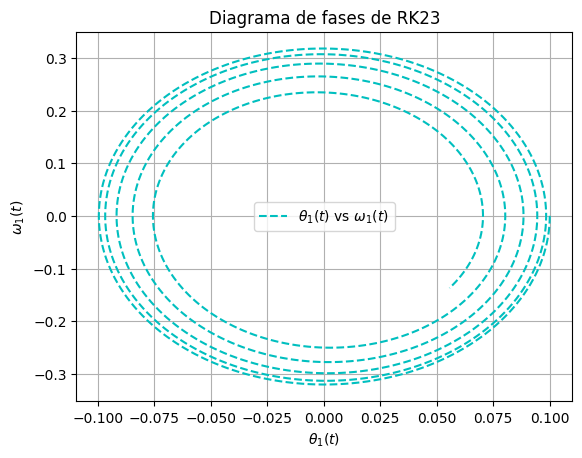

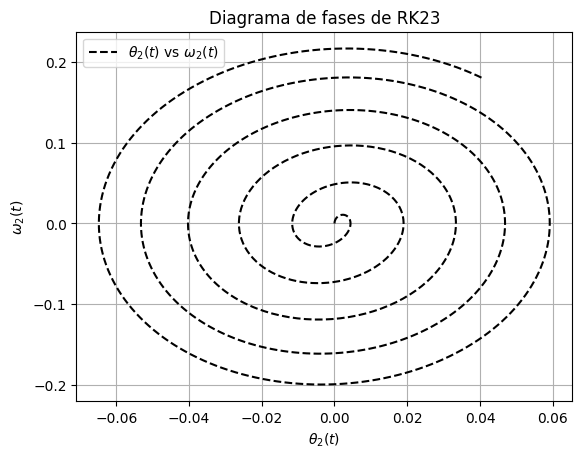

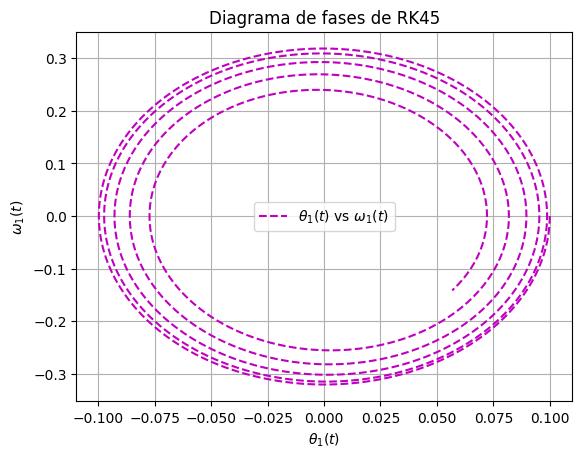

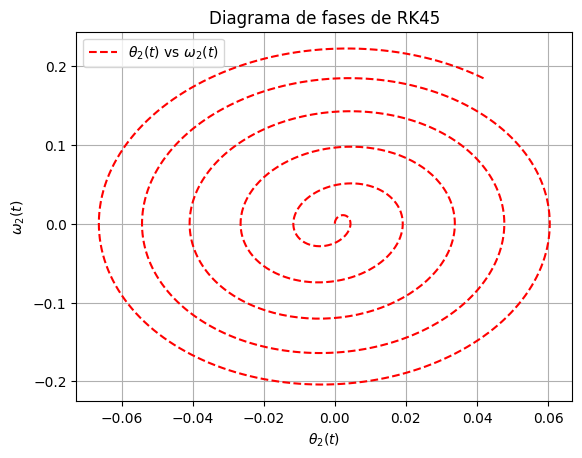

In [34]:
plt.plot(theta1_23, omega1_23, 'c--', label=r'$\theta_{1}(t)$ vs $\omega_{1}(t)$')
plt.title('Diagrama de fases de RK23')
plt.legend()
plt.xlabel(r'$\theta_{1}(t)$')
plt.ylabel(r'$\omega_{1}(t)$')
plt.grid()
plt.show()

plt.plot(theta2_23, omega2_23, 'k--', label=r'$\theta_{2}(t)$ vs $\omega_{2}(t)$')
plt.title('Diagrama de fases de RK23')
plt.legend()
plt.xlabel(r'$\theta_{2}(t)$')
plt.ylabel(r'$\omega_{2}(t)$')
plt.grid()
plt.show()

plt.plot(theta1_45, omega1_45, 'm--', label=r'$\theta_{1}(t)$ vs $\omega_{1}(t)$')
plt.title('Diagrama de fases de RK45')
plt.legend()
plt.xlabel(r'$\theta_{1}(t)$')
plt.ylabel(r'$\omega_{1}(t)$')
plt.grid()
plt.show()
plt.plot(theta2_45, omega2_45, 'r--', label=r'$\theta_{2}(t)$ vs $\omega_{2}(t)$')
plt.title('Diagrama de fases de RK45')
plt.legend()
plt.xlabel(r'$\theta_{2}(t)$')
plt.ylabel(r'$\omega_{2}(t)$')
plt.grid()
plt.show()

## Por método de Euler:

$$\mathbf{Y}_{k+1} = (\mathbf{I} + h\mathbf{A})\mathbf{Y}_k + h\mathbf{b}(t_k)$$

In [35]:
def sistema_euler(A, y0, b, t0, tf, h):
    t_values = np.arange(t0, tf, h)
    n = len(y0)
    y_vals = np.zeros((len(t_values), n))
    y_vals[0] = y0
    #print(y_vals)

    for k in range(1, len(y_vals)):
        y_vals[k] = (np.eye(n) + h*A)@y_vals[k-1] + h*b
    return t_values, y_vals

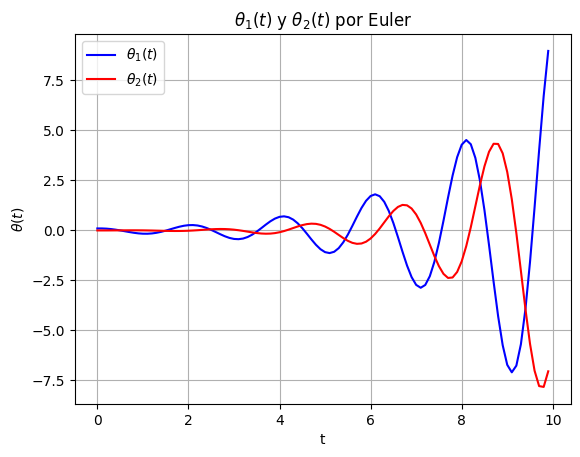

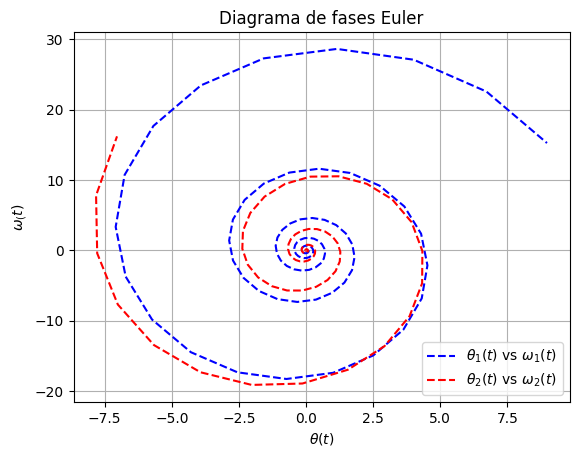

In [36]:
t_euler, y = sistema_euler(A, y0, b, t0, tf, h)

theta1_euler = y[:,0]
omega1_euler = y[:,1]
theta2_euler = y[:,2]
omega2_euler = y[:,3]

plt.plot(t_euler, theta1_euler, 'b', label=r'$\theta_{1}(t)$')
plt.plot(t_euler, theta2_euler, 'r', label=r'$\theta_{2}(t)$')
plt.title(r'$\theta_{1}(t)$ y $\theta_{2}(t)$ por Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.grid()
plt.show()

plt.plot(theta1_euler, omega1_euler, 'b--', label=r'$\theta_{1}(t)$ vs $\omega_{1}(t)$')
plt.plot(theta2_euler, omega2_euler, 'r--', label=r'$\theta_{2}(t)$ vs $\omega_{2}(t)$')
plt.title(r'Diagrama de fases Euler')
plt.legend()
plt.xlabel(r'$\theta(t)$')
plt.ylabel(r'$\omega_(t)$')
plt.grid()
plt.show()

## Estabilidad:

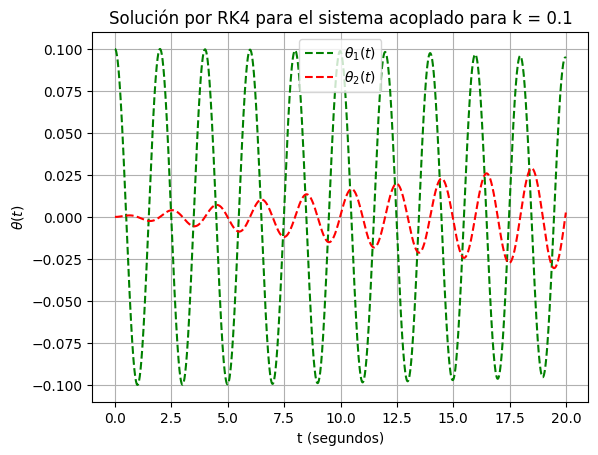

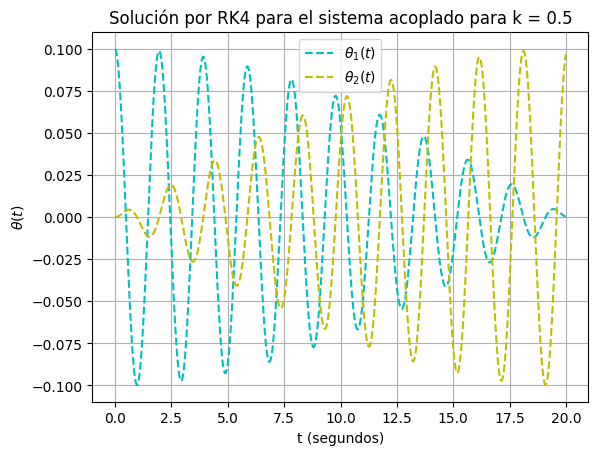

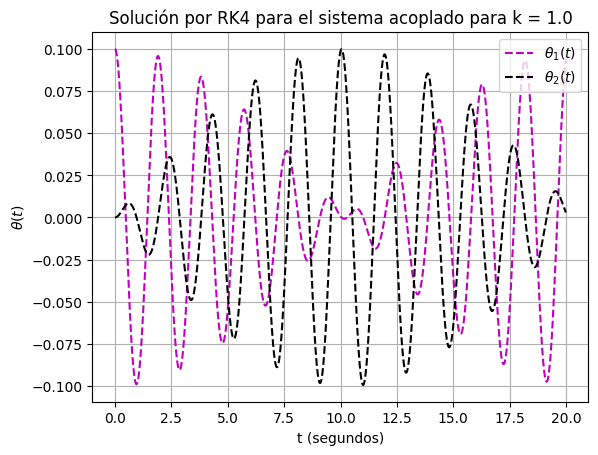

In [38]:
t0, tf = 0, 20
t_span = np.array([t0, tf])
t_ = np.arange(t0, tf, 0.01)

k = np.array([0.1, 0.5, 1.0])

y0 = np.array([0.1, 0, 0, 0])

def sistema_RK_estability(t, y, k_):
    A = np.array([
    [0,1,0,0],
    [-(g/L + k_/m), 0, k_/m, 0],
    [0,0,0,1],
    [k_/m, 0, -(g/L + k_/m), 0]
    ])
    return A @ y

t45 = []
theta1_45 = []
omega1_45 = []
theta2_45 = []
omega2_45 = []

for i in k:
    solucion45 = solve_ivp(sistema_RK_estability, t_span, y0, method='RK45', args=(i,), t_eval=t_)

    t45.append(solucion45.t)
    theta1_45.append(solucion45.y[0])
    omega1_45.append(solucion45.y[1])
    theta2_45.append(solucion45.y[2])
    omega2_45.append(solucion45.y[3])

plt.plot(t45[0], theta1_45[0], 'g--', label=r'$\theta_{1}(t)$')
plt.plot(t45[0], theta2_45[0], 'r--', label=r'$\theta_{2}(t)$')
plt.title(f'Solución por RK4 para el sistema acoplado para k = {k[0]}')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$\theta(t)$')
plt.grid()
plt.show()

plt.plot(t45[1], theta1_45[1], 'c--', label=r'$\theta_{1}(t)$')
plt.plot(t45[1], theta2_45[1], 'y--', label=r'$\theta_{2}(t)$')
plt.title(f'Solución por RK4 para el sistema acoplado para k = {k[1]}')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$\theta(t)$')
plt.grid()
plt.show()

plt.plot(t45[2], theta1_45[2], 'm--', label=r'$\theta_{1}(t)$')
plt.plot(t45[2], theta2_45[2], 'k--', label=r'$\theta_{2}(t)$')
plt.title(f'Solución por RK4 para el sistema acoplado para k = {k[2]}')
plt.legend()
plt.xlabel('t (segundos)')
plt.ylabel(r'$\theta(t)$')
plt.grid()
plt.show()

# 8
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh** 
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter

## Valores propios de la matriz $A$:

In [72]:
y = sp.symbols('y')
x = sp.symbols('x')
m1, m2 = 4, 0.1
G = 6.67e-11
w = 1
mu = m2/(m1+m2)
print(mu)

r1 = sp.sqrt((x+mu)**2 + y**2)
r2 = sp.sqrt((x-1+mu)**2 + y**2)

U = G*(m1/r1 - m2/r2) * (w**2/2)*(x**2 + y**2)

du2_dx = sp.diff(U, x, 2) 
du2_dy = sp.diff(U, y, 2)
du2_dxy = sp.diff(U, x, y)
du2_dyx = sp.diff(U, y, x)

L4 = np.array([(1/2)-mu, np.sqrt(3)/2])
L5 = np.array([(1/2)-mu, -np.sqrt(3)/2])

0.02439024390243903


In [73]:
du2_dxl = sp.lambdify((x,y), du2_dx)
du2_dyl = sp.lambdify((x,y), du2_dy)
du2_dxyl = sp.lambdify((x,y), du2_dxy)
du2_dyxl = sp.lambdify((x,y), du2_dyx)

In [74]:
a = du2_dxl(L4[0], L4[1])
b = du2_dyl(L4[0], L4[1])
c = du2_dxyl(L4[0], L4[1])
d = du2_dyxl(L4[0], L4[1])

Valores propios de la matriz A:

In [75]:
A = np.array([
    [0,1,0,0],
    [a, 0, b, 2*w],
    [0,0,0,1],
    [c, -2*w, d, 0]
])

eig_vals, eig_vecs = np.linalg.eig(A)
eig_vals

array([ 2.02027284e-11+2.j,  2.02027284e-11-2.j, -5.64902160e-11+0.j,
        1.60846235e-11+0.j])

## Variando $\mu$:

In [76]:
mu_ = np.linspace(0,0.5,300)

In [83]:
y = sp.symbols('y')
x = sp.symbols('x')
m1, m2 = 1, 10
G = 6.67e-11
w = 1
mu = sp.symbols('mu')

r1 = sp.sqrt((x+mu)**2 + y**2)
r2 = sp.sqrt((x-1+mu)**2 + y**2)

U = G*(m1/r1 - m2/r2) * (w**2/2)*(x**2 + y**2)

du2_dx = sp.diff(U, x, 2) 
du2_dy = sp.diff(U, y, 2)
du2_dxy = sp.diff(U, x, y)
du2_dyx = sp.diff(U, y, x)

du2_dxl = sp.lambdify((x,y,mu), du2_dx)
du2_dyl = sp.lambdify((x,y,mu), du2_dy)
du2_dxyl = sp.lambdify((x,y,mu), du2_dxy)
du2_dyxl = sp.lambdify((x,y,mu), du2_dyx)

L4x = np.zeros_like(mu_)
L5x = np.zeros_like(mu_)
L4y = np.zeros_like(mu_)
L5y = np.zeros_like(mu_)

for i, j in enumerate(mu_):
    L4x[i] = (1/2) - j
    L4y[i] = np.sqrt(3)/2
    L5x[i] = (1/2) - j
    L5y[i] = -np.sqrt(3)/2

L4 = np.column_stack((L4x, L4y))
L5 = np.column_stack((L5x, L5y))

In [102]:
a_listL4 = np.zeros(np.shape(L4)[0])
b_listL4 = np.zeros(np.shape(L4)[0])
c_listL4 = np.zeros(np.shape(L4)[0])
d_listL4 = np.zeros(np.shape(L4)[0])

a_listL5 = np.zeros(np.shape(L5)[0])
b_listL5 = np.zeros(np.shape(L5)[0])
c_listL5 = np.zeros(np.shape(L5)[0])
d_listL5 = np.zeros(np.shape(L5)[0])

for i in range(len(L4)):
    a_listL4[i] = du2_dxl(L4[i,0], L4[i,1], mu_[i])
    b_listL4[i] = du2_dyl(L4[i,0], L4[i,1], mu_[i])
    c_listL4[i] = du2_dxyl(L4[i,0], L4[i,1], mu_[i])
    d_listL4[i] = du2_dyxl(L4[i,0], L4[i,1], mu_[i])
for j in range(len(L5)):
    a_listL5[j] = du2_dxl(L5[j,0], L5[j,1], mu_[j])
    b_listL5[j] = du2_dyl(L5[j,0], L5[j,1], mu_[j])
    c_listL5[j] = du2_dxyl(L5[j,0], L5[j,1], mu_[j])
    d_listL5[j] = du2_dyxl(L5[j,0], L5[j,1], mu_[j])

In [105]:
l4 = np.zeros((300,4))
l5 = np.zeros((300,4))

for i in range(len(a_listL4)):
    a_ = a_listL4[i]
    b_ = b_listL4[i]
    c_ = c_listL4[i]
    d_ = d_listL4[i]
    A = np.array([
        [0,1,0,0],
        [a_, 0, b_, 2*w],
        [0,0,0,1],
        [c_, -2*w, d_, 0]
    ])
    
    eig_vals, eig_vecs = np.linalg.eig(A)
    l4[i] = np.real(eig_vals)

for j in range(len(a_listL5)):
    a_5 = a_listL5[j]
    b_5 = b_listL5[j]
    c_5 = c_listL5[j]
    d_5 = d_listL5[j]
    A = np.array([
        [0,1,0,0],
        [a_5, 0, b_5, 2*w],
        [0,0,0,1],
        [c_5, -2*w, d_5, 0]
    ])
    
    eig_vals, eig_vecs = np.linalg.eig(A)
    l5[i] = np.real(eig_vals)

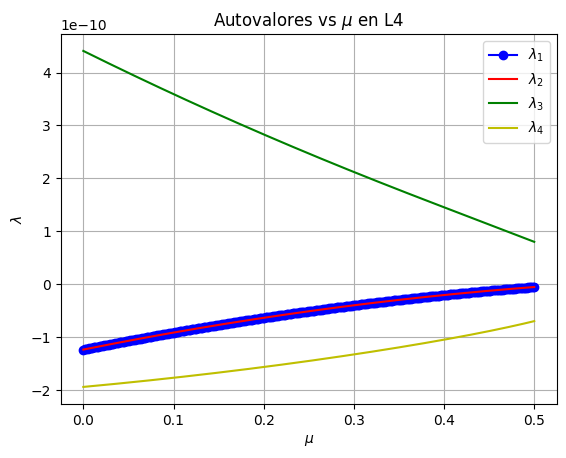

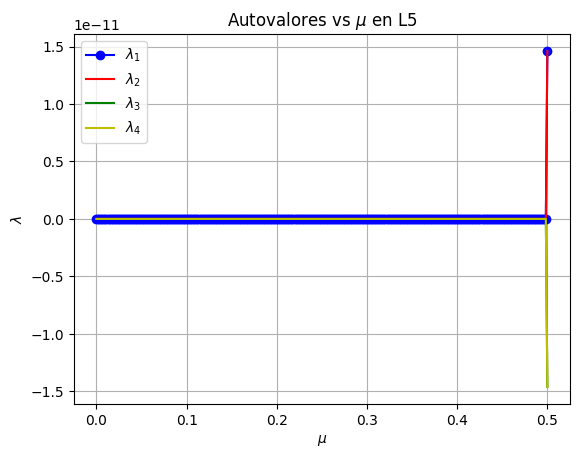

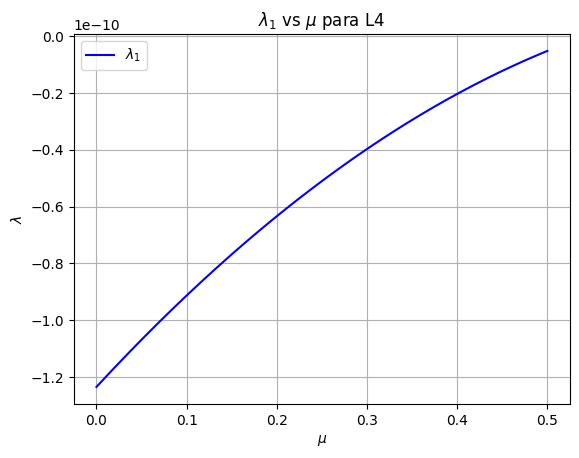

In [107]:
plt.plot(mu_, l4[:,0],'b-o', label=r'$\lambda_{1}$')
plt.plot(mu_, l4[:,1],'r', label=r'$\lambda_{2}$')
plt.plot(mu_, l4[:,2],'g', label=r'$\lambda_{3}$')
plt.plot(mu_, l4[:,3],'y', label=r'$\lambda_{4}$')
plt.title(r'Autovalores vs $\mu$ en L4')
plt.legend()
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$\mu$')
plt.grid()
plt.show()

plt.plot(mu_, l5[:,0],'b-o', label=r'$\lambda_{1}$')
plt.plot(mu_, l5[:,1],'r', label=r'$\lambda_{2}$')
plt.plot(mu_, l5[:,2],'g', label=r'$\lambda_{3}$')
plt.plot(mu_, l5[:,3],'y', label=r'$\lambda_{4}$')
plt.title(r'Autovalores vs $\mu$ en L5')
plt.legend()
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$\mu$')
plt.grid()
plt.show()

plt.plot(mu_, l[:,0],'b', label=r'$\lambda_{1}$')
plt.title(r'$\lambda_{1}$ vs $\mu$ para L4')
plt.legend()
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$\mu$')
plt.grid()
plt.show()

Luego de varios análisis, no pudimos llegar a una conclusión definitiva sobre la estabilidad de las soluciones.

# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  



In [108]:
ly = 9.46e12
r = 120
V0 = -200
Omega = V0/r
kappa = np.sqrt(2)*Omega
t0, tf = 0, 10
t_span = np.array([t0, tf])
t_ = np.linspace(t0, tf, 600)

B = np.array([[0,1],[-kappa**2, 0]])

sigma_0 = np.array([0,V0])
print(kappa)

-2.3570226039551585


## Valores propios de $B$:

In [109]:
autovalores_B , autovectores_B = np.linalg.eig(B) 
print(autovalores_B)

[0.+2.3570226j 0.-2.3570226j]


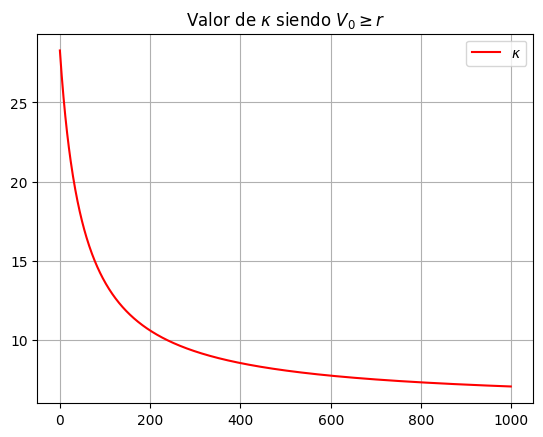

In [110]:
r_array = np.linspace(10, 200, 1000)
V0_array = np.linspace(200, 1000, 1000)

kappa1_array = np.sqrt(2)*(V0_array/r_array)

lista = np.zeros_like(kappa1_array)

for i in range(len(kappa1_array)):
    lista[i] = i

plt.plot(lista, kappa1_array, 'r-', label=r'$\kappa$')
plt.title(r'Valor de $\kappa$ siendo $V_{0} \geq r$')
plt.legend()
plt.grid()
plt.show()

## Solución de la EDO:

In [111]:
def galaxia(t, y0):
    return B @ y0

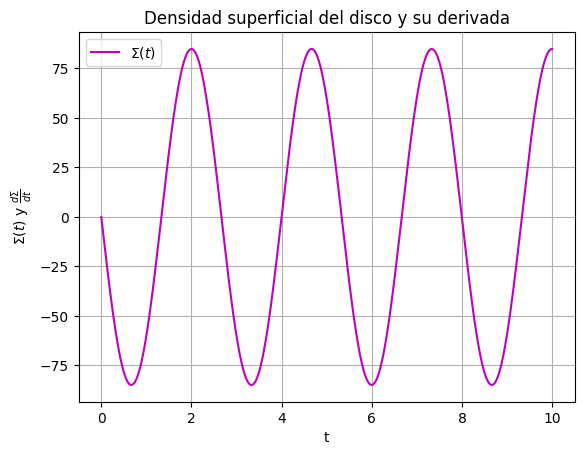

In [112]:
sol_galax = solve_ivp(galaxia, t_span, sigma_0, method='RK45', t_eval=t_)

t = sol_galax.t
sigma = sol_galax.y[0]
d_sigma = sol_galax.y[1]

plt.plot(t, sigma, 'm-', label=r'$\Sigma(t)$')
#plt.plot(t, d_sigma, 'b-', label=r'$\frac{d\Sigma}{dt}$')
plt.title('Densidad superficial del disco y su derivada')
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$\Sigma(t)$ y $\frac{d\Sigma}{dt}$')
plt.grid()
plt.show()

## Estabilidad:

In [118]:
#ly = 9.46e12
#r_list = np.array([120,200,530])
#V0 = -200
#Omega = V0/r
#kappa = np.sqrt(2)*Omega
#t0, tf = 0, 10
#t_span = np.array([t0, tf])
#t_ = np.linspace(t0, tf, 600)

#def galaxia_iter(t, y0, r_):
#    kappa_ = np.sqrt(2)*(V0/r_)
#
#    B = np.array([[0,1],[-kappa_**2, 0]])
#    return B

#sigma_0 = np.array([0,V0])

#t_list = []
#sigma_list = []

#for i in r_list:
#    solucion = solve_ivp(galaxia_iter, t_span, sigma_0, method='RK45', args=(i,), t_eval=t_)
#    t_list.append(solucion.t)
#    sigma_list.append(solucion.y[0])

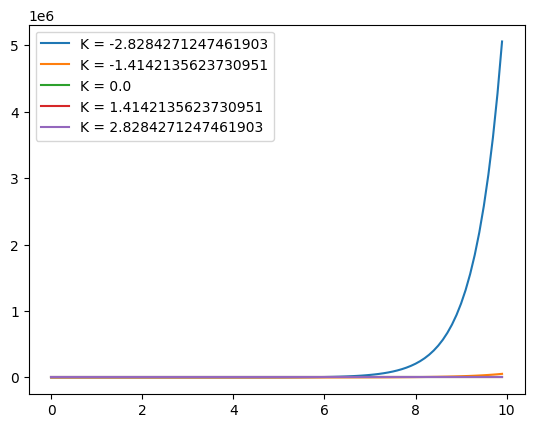

In [117]:
v0 = 1
t0, tf = 0, 10
t = np.arange(0, 10, 0.1)
kappa = np.sqrt(2)

kappa_ = []
for i in range(-2, 3):
  kappa = np.sqrt(2) * i
  kappa_.append(kappa)

def Y(t, sigma, kappa):

  dYdt = np.zeros_like(sigma)

  dYdt[0] = sigma[1]
  dYdt[1] = - (kappa * sigma[0])

  return dYdt

for i in kappa_:
  sigma_sol1 = solve_ivp(Y, (t0, tf), [0, v0], t_eval = t, args = (i,))

  sigma_t1 = sigma_sol1.t
  sigma1 = sigma_sol1.y[0]

  plt.plot(sigma_t1, sigma1, label = f'K = {i}')
  plt.legend()

## Solución exacta:

In [114]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import t
f = Function('f')
edo = Derivative(f(t), t, 2) + (2)*f(t)
dsolve(edo, f(t))

Eq(f(t), C1*sin(sqrt(2)*t) + C2*cos(sqrt(2)*t))